In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.datasets import load_boston

In [9]:
dataset, Yd = load_boston(return_X_y=True)
n = dataset.shape[0]
percent = int((n*80)/100)

X = dataset[:percent,:]
Y = Yd[:percent].reshape((percent,1))

Xt = dataset[percent:,:]
n = Xt.shape[0]
Yt = Yd[percent:,].reshape((n,1))

In [10]:
# linear regression
def linearRegression(X, Y):
    w1 = X.dot(X.T)
    try:
        inv = np.linalg.inv(w1)
    except Exception as e:
        n = w1.shape[0]
        iden = np.identity(n)
        w1 += iden
        inv = np.linalg.inv(w1)
    w2 = X.dot(Y)
    w = inv.dot(w2)
    return w

In [11]:
def calcRMSE(x, w, Y):
    mse = 0
    n = x.shape[1]
    d = x.shape[0]
    for i in range(n):
        xi = x[:,i].reshape((d,1))
        pred = (w.T).dot(xi)
        yi = Y[i][0]
        mse += ( yi - pred )**2

    rmse = math.sqrt(mse/n)
    return rmse

In [12]:
def  ploynominal(m, X):
    n = X.shape[0]
    row = np.zeros((n,1))
    ones = np.ones((n,1))
    final = np.array(X)
    final = np.append(final, ones , axis =1)
    p = 2
    for k in range(1,m):
        row = np.zeros((n,1))
        for i in range(len(final)):
            row[i][0] = X[i][0]**(p)
        p += 1
        final = np.append( row , final, axis =1 )
    return final.T

In [13]:
def plot( X, Y, w, label):
    ypred = (w.T).dot(x)
    plt.scatter( X , Y )
    plt.plot(X, ypred.T,'ko')
    plt.title(label)
    plt.show()

In [14]:
# Que 1 b part
# Perform Linear regression for all features and compute the RMSE for training
# as well as the testing set.
x = ploynominal( 1 , X)
w = linearRegression(x, Y)
rmse = calcRMSE(x, w, Y)
print( "rmse of the training dataset is " , rmse )

x = ploynominal(1 , Xt)
w = linearRegression(x, Yt)
rmse = calcRMSE(x, w, Yt)
print( "rmse of the testing dataset is " , rmse )


rmse of the training dataset is  4.772670062114161
rmse of the testing dataset is  3.147106095206288


In [15]:
# c part Select the feature named ‘LSTAT’ for polynomial regression.
n = X.shape[0]
lstat = X[:, 12].reshape((n,1))

x = ploynominal( 1 , lstat)
w = linearRegression(x, Y)
rmse = calcRMSE(x, w, Y)
print( "rmse of the lstat is " , rmse )


rmse of the lstat is  6.526667958192224


In [16]:
# Que 1 d part Perform k-fold cross-validation for k=5 on the training dataset.
# k-fold validation
def kFold(X, Y, k):
    n = X.shape[0]
    length = int(n/k)
    prev_index = 0
    new_index = length
    xiArray = []
    yiArray = []
    
    testX = []
    testY = []
    for i in range(k):
        subPart = X[prev_index:new_index, :]
        label = Y[prev_index:new_index]

        yiArray.append(label)
        xiArray.append(subPart)
        prev_index = new_index
        new_index += length
    
    xList = []
    yList = []
    flag =0

    for j in range(k):
        features = []
        labels = []
        for i in range(k):
            features.append(xiArray[i])
            labels.append(yiArray[i])
            
        testF = features[flag]
        testL = labels[flag]
        testX.append(testF)
        testY.append(testL)
        
        del features[flag]
        del labels[flag]
        
        finalX = np.array(features[0])
        finalY = np.array(labels[0])

        for m in range(1, k-1):
            finalX = np.concatenate((features[m], finalX))
            finalY = np.concatenate((labels[m], finalY))
            xList.append(finalX)
            yList.append(finalY)
        flag += 1
    
    return (xList, yList, testX, testY)

In [17]:
# d part) Perform k-fold cross-validation for k=5 on the training dataset. (Note: You can
# not use any inbuilt library to implement k-fold cross-validation.)
# training data - lstat

# validation_error
xList, yList, testX, testY = kFold(lstat,Y,5)
avg =0
for j in range(5):
    x = ploynominal(1, xList[j])
    w = linearRegression(x, yList[j])
    x = ploynominal(1, testX[j])
    cross_valid = calcRMSE(x, w, testY[j])
    avg += cross_valid
    
print("validation error on training dataset",avg/5)
       
avg =0
xList, yList, testX, testY = kFold(lstat,Y,5)
for j in range(5):
    x = ploynominal(1, xList[j])
    w = linearRegression( x, yList[j])
    x = ploynominal(1, xList[j])
    training_error = calcRMSE( x, w, yList[j])
    avg += training_error
print("training error on training dataset",avg/5)


validation error on training dataset 6.735802671222214
training error on training dataset 6.53978251813079


In [19]:
# e part) Perform step (d) for different degrees of polynomials using Polynomial
# Regression (Ex. For degree=1 perform 5-fold cross-validation, For degree=2,
# perform 5-fold cross-validation and so on.)
# validation_error
xList, yList, testX, testY = kFold(lstat,Y,5)
validError = []
minAvg = 100000
for m in range(1,8):
    avg =0
    for j in range(5):
        x = ploynominal(m, xList[j])
        w = linearRegression(x, yList[j])
        x = ploynominal(m, testX[j])
        cross_valid = calcRMSE(x, w, testY[j])
        avg += cross_valid
    if( minAvg > avg/5 ):
        minAvg = avg/5
        bestm = m
    validError.append(avg/5)
print("Validation error for different degrees", validError)
print("best m that fits the dataset best is m :", bestm)

Validation error for different degrees [6.735802671222214, 6.176132099293534, 5.729097068452185, 5.791846640699091, 5.650273767070741, 5.941306705531024, 9.228573540580067]
best m that fits the dataset best is m : 5


In [20]:
# training_error
xList, yList, testX, testY = kFold(lstat,Y,5)
trainError = []
for m in range(1,8):
    avg = 0
    for j in range(5):
        x = ploynominal(m, xList[j])
        w = linearRegression( x, yList[j])

        x = ploynominal(m, xList[j])
        training_error = calcRMSE( x, w, yList[j])
        avg += training_error
    trainError.append(avg/5)
print("Training error for different degrees", trainError)

Training error for different degrees [6.53978251813079, 5.54162192979593, 5.289438846425401, 5.202319934636476, 5.183092554316819, 5.173174312836759, 5.165044439601641]


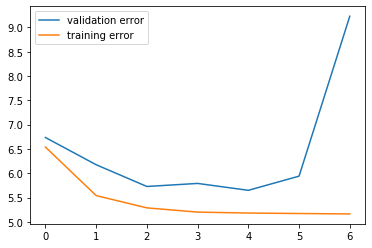

In [21]:
# f part) Use RMSE as an evaluation metric (Note: You can’t use any inbuilt library for
# it). Compute mean RMSE of training and validation set separately from 5-fold
# cross-validation for each degree of the polynomial and plot it.

plt.plot(validError, label= "validation error")
plt.plot(trainError, label= "training error")
plt.legend()
plt.show()

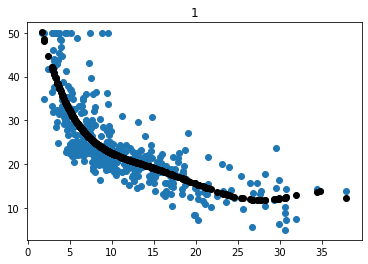

Testing error : 4.084072491699279


In [22]:
# g part ) Choose the degree of a polynomial with the least mean validation RMSE and
# use that degree of polynomial to perform final regression on the whole training
# dataset (i.e., 80% dataset). State the RMSE of the test dataset (i.e., 20%
# dataset).
# best degree = m = 5

x = ploynominal(5, lstat)
w = linearRegression(x, Y)
plot(lstat, Y, w,"1")

lstatTest = Xt[:, 12]
n = lstatTest.shape[0]
lstatTest = lstatTest.reshape((n, 1))

x = ploynominal( 5, lstatTest )
testing_error = calcRMSE(x, w, Yt)
print("Testing error :",testing_error)